# Part I

### 1. Apply as many of the different visualization techniques described in the tutorial as possible: 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
from pandas.api.types import is_numeric_dtype
from pandas.api.types import is_object_dtype

In [2]:
data = pd.read_csv('adult.data')

In [3]:
with open(r'adult.names', 'r') as fp:
    col_names = fp.readlines()[96:110]

In [4]:
col_names

['age: continuous.\n',
 'workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.\n',
 'fnlwgt: continuous.\n',
 'education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.\n',
 'education-num: continuous.\n',
 'marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.\n',
 'occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.\n',
 'relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.\n',
 'race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.\n',
 'sex: Female, Male.\n',
 'capital-gain: continuous.\n',
 'capital-loss: continuous.\n',
 'hours-per-wee

In [5]:
newl = list(map(lambda x: x.split(':')[0], col_names))
print(len(newl))

14


In [6]:
# 'class' attribute is the income column of less than or greater than 50k.
newl.append('class')

In [7]:
newl

['age',
 'workclass',
 'fnlwgt',
 'education',
 'education-num',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'native-country',
 'class']

In [8]:
missing_values = [" ?"]
data = pd.read_csv('adult.data', names=newl, header=None, index_col=False, na_values=missing_values)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [9]:
data['class'].value_counts()

class
 <=50K    24720
 >50K      7841
Name: count, dtype: int64

In [10]:
data.describe(include='all')

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
count,32561.000000,30725,3.256100e+04,32561,32561.000000,32561,30718,32561,32561,32561,32561.000000,32561.000000,32561.000000,31978,32561
unique,NaN,8,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22696,NaN,10501,NaN,14976,4140,13193,27816,21790,NaN,NaN,NaN,29170,24720
mean,38.581647,NaN,1.897784e+05,NaN,10.080679,NaN,NaN,NaN,NaN,NaN,1077.648844,87.303830,40.437456,NaN,NaN
std,13.640433,NaN,1.055500e+05,NaN,2.572720,NaN,NaN,NaN,NaN,NaN,7385.292085,402.960219,12.347429,NaN,NaN
min,17.000000,NaN,1.228500e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.178270e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.783560e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,48.000000,NaN,2.370510e+05,NaN,12.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


### 2.1 For each continuous attribute, calculate its average, standard deviation, minimum, and maximum values.

In [11]:
for col in data.columns:
    if is_numeric_dtype(data[col]):
        print('%s:' % (col))
        print('\t Mean = %.2f' % data[col].mean())
        print('\t Standard deviation = %.2f' % data[col].std())
        print('\t Minimum = %.2f' % data[col].min())
        print('\t Maximum = %.2f' % data[col].max())

age:
	 Mean = 38.58
	 Standard deviation = 13.64
	 Minimum = 17.00
	 Maximum = 90.00
fnlwgt:
	 Mean = 189778.37
	 Standard deviation = 105549.98
	 Minimum = 12285.00
	 Maximum = 1484705.00
education-num:
	 Mean = 10.08
	 Standard deviation = 2.57
	 Minimum = 1.00
	 Maximum = 16.00
capital-gain:
	 Mean = 1077.65
	 Standard deviation = 7385.29
	 Minimum = 0.00
	 Maximum = 99999.00
capital-loss:
	 Mean = 87.30
	 Standard deviation = 402.96
	 Minimum = 0.00
	 Maximum = 4356.00
hours-per-week:
	 Mean = 40.44
	 Standard deviation = 12.35
	 Minimum = 1.00
	 Maximum = 99.00


### 2.2 For the discrete attribute, count the frequency for each of its distinct values.

In [12]:
print(data.dtypes)

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
class             object
dtype: object


In [13]:
for col in data.columns:
    if is_object_dtype(data[col]):
        print('\n\t', data[col].value_counts())


	 workclass
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: count, dtype: int64

	 education
 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: count, dtype: int64

	 marital-status
 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: count, dtype: int64

	 occupation
 Prof-specialty       4140
 Craft-repair         4099
 E

### 2.3 Draw histogram of the class variable.

In [14]:
data['class'].unique()

array([' <=50K', ' >50K'], dtype=object)

In [15]:
data['class'] = data['class'].map({' <=50K':0, ' >50K':1}).astype(int)

In [16]:
data.head(3)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0


<Axes: >

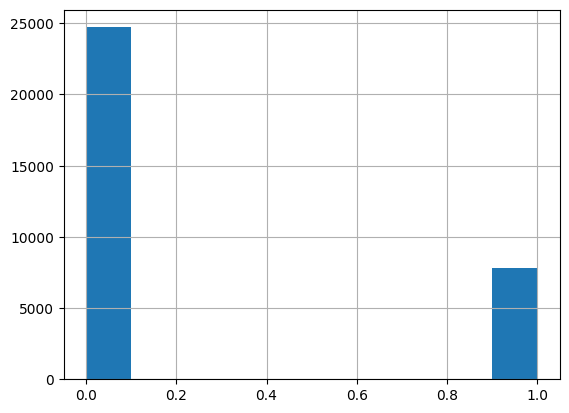

In [17]:
%matplotlib inline

data['class'].hist()

#### for 2.7:

There are more occurrences of class 0 (less than or equal to 50k) than class 1 (greater than 50k). This could suggest that there are more peope who's income in less or equal to 50k in the area this census was conducted within.

### 2.4 Draw the distribution of values for a continuous attribute using a histogram.

<Axes: >

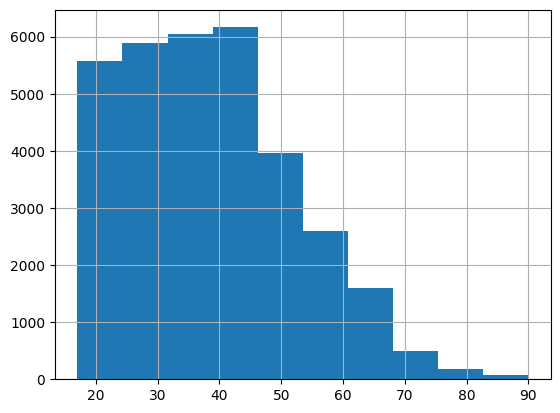

In [18]:
data['age'].hist(bins=10)

#### for 2.7:

The majority of ages are between 17 (approx)-45 (approx). The bin that is most frequent are ages 37-46 (both an approximation). This would suggest that the majority of people within the area of the census are in this age range, while those older are in the minority.

### 2.5 Draw some scatter plots for a couple of attribute pairs.

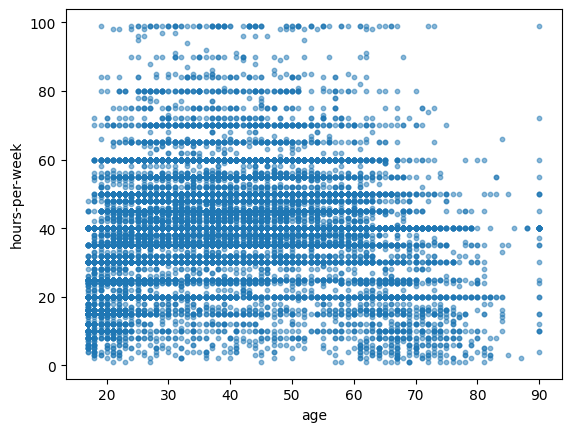

In [19]:
data.plot.scatter(x='age', y='hours-per-week', s=10, alpha=0.5);

#### for 2.7:

The major cluster is around 40 hours per week, which is the average number of hours per week. Those who work 40 hours a week appear to be approximately between the ages of 20 and 65. There is an outlier where the greatest age works 100 hours per week.That being said, as observed in the graph above, this data may be better at showing how many hours those underneath the age of 50 work per week, as there are not many people in the census data who are older.

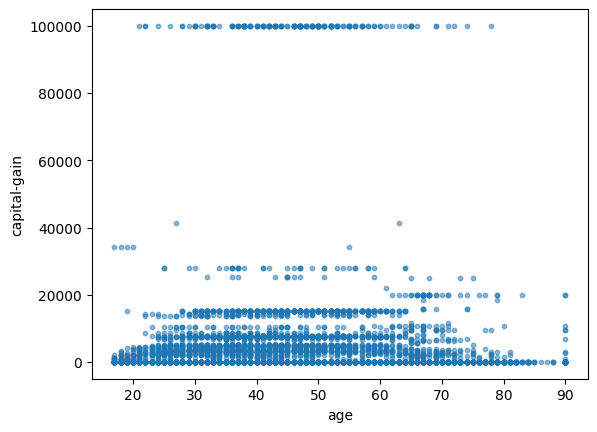

In [20]:
data.plot.scatter(x='age', y='capital-gain', s=10, alpha=0.5);

Increased capital gain (around 10,000) is more concentrated for those within the ages of 30-65. It should be noted that the most frequent age group in the data is approx. 37 to 45. Therefore, it may not be a correlation between the ages and the concentration rate. 

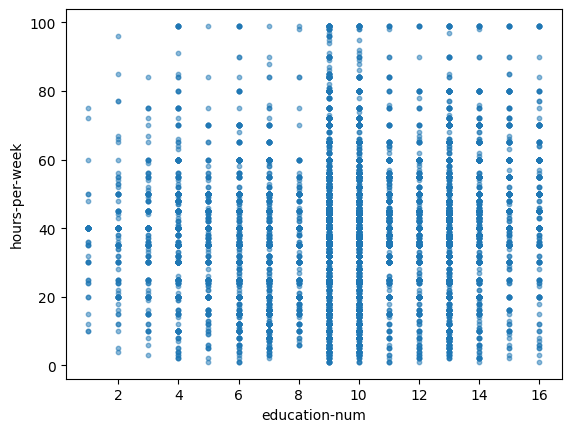

In [21]:
data.plot.scatter(x='education-num', y='hours-per-week', s=10, alpha=0.5);

Those with 9-10 years of education seem to work the most hours per week. Those with less than 2 years work the less. There is a noticeable increase in the amount of hours per week the more years of education someone has. This does not suggest that more years of education equals more hours per week of work, as those with 11 and over years work less hours-per-week than 9 to 10 years. 

### 2.6 Draw a parallel diagram for some attributes in the data set.

In [22]:
df2 = data.copy()

In [23]:
data['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [24]:
# assigning an ordinal "rank" 
df2['marital-status'] = \
df2['marital-status'].map({' Never-married':0, ' Divorced':1, ' Widowed':2, ' Separated':3, \
                           ' Married-spouse-absent':4, ' Married-civ-spouse':5, ' Married-AF-spouse':6}).astype(int)

In [25]:
df2['marital-status'].unique()

array([0, 5, 1, 4, 3, 6, 2])

<Axes: >

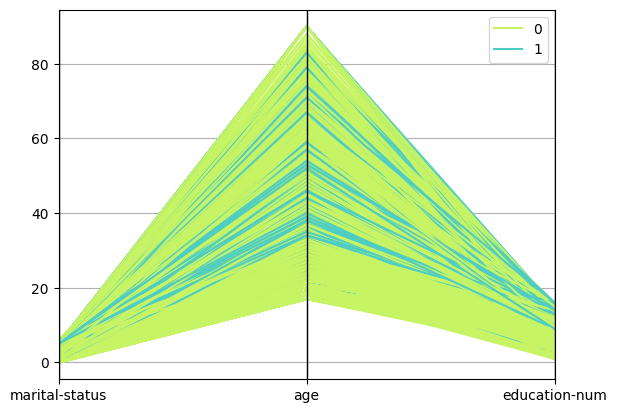

In [26]:
cols = ['class', 'marital-status', 'age', 'education-num']
parallel_coordinates(df2[cols], 'class', color=('#C7F464', '#4ECDC4'))

There are more instances of those making less than 50k (of class 0) with a "lower ranking" marital status between the ages of approximately 18-30. 

<Axes: >

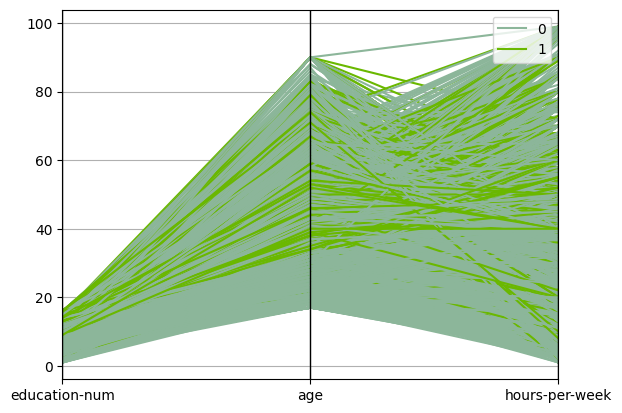

In [28]:
cols = ['class', 'education-num', 'age', 'hours-per-week']
parallel_coordinates(data[cols], 'class')

Education years increases with age and hours per week is concentrated around 20-60 hours for ages 18-60. This suggests that the area in which this census was conducted is populated mainly by individuals who fit this description.

# Part II

###  1. Identify which attributes have missing values and address the issue by:

In [29]:
data.isna().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
class                0
dtype: int64

###  1.1 Replacing missing values by the average or mod of the attribute (based on attribute types)

In [30]:
# finding mode for each attribute
mode_vals = data.apply(lambda x: x.mode().iloc[0])
mode_vals

age                                36
workclass                     Private
fnlwgt                         123011
education                     HS-grad
education-num                       9
marital-status     Married-civ-spouse
occupation             Prof-specialty
relationship                  Husband
race                            White
sex                              Male
capital-gain                        0
capital-loss                        0
hours-per-week                     40
native-country          United-States
class                               0
dtype: object

In [31]:
# replace missing values with attribute mode

#missing_col = 'workclass'
#mode_val = data_after[missing_col].mode()[0]
#data_after[missing_col].fillna(mode_val, inplace=True)

data2 = data.copy()
missing_cols = ['workclass', 'occupation', 'native-country']

for i in missing_cols:
    print('%s:' % (i))
    print('\t before %s' % data2[i].isna().sum())
    mode_value = data2[i].mode()[0]
    data2[i].fillna(mode_value, inplace=True)
    print('\t after %s' % data2[i].isna().sum())
    print('\n')

workclass:
	 before 1836
	 after 0


occupation:
	 before 1843
	 after 0


native-country:
	 before 583
	 after 0




###  1.2 Replace missing values by the average or mode of the attribute in the particular class to which the instance belongs  

In [32]:
data.groupby('class')['age'].agg(pd.Series.mode)

class
0          23
1    [37, 46]
Name: age, dtype: object

In [33]:
# finding mode for each attribute that belongs to a class
class_mode_vals = data.groupby('class')[data.iloc[:, :14].columns].apply(lambda x: x.mode().iloc[0])
class_mode_vals

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
class,,,,,,,,,,,,,,
0,23.0,Private,113364.0,HS-grad,9.0,Never-married,Adm-clerical,Not-in-family,White,Male,0.0,0.0,40.0,United-States
1,37.0,Private,123011.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.0,United-States


The mode of age for classes 0 ( <=50k ) and 1 ( >50k ) is 37 and 46. 

In [34]:
# replace missing values with class-attribute mode

#data2['workclass'] = data.groupby(['class'])['workclass'].transform(lambda x: np.where(pd.isna(x), x.mode(),x))

data3 = data.copy()
missing_cols = ['workclass', 'occupation', 'native-country']

for i in missing_cols:
    print('%s:' % (i))
    print('\t before %s' % data3[i].isna().sum())
    data3[i] = data.groupby(['class'])[i].transform(lambda x: np.where(pd.isna(x), x.mode(), x))
    print('\t after %s' % data3[i].isna().sum())
    print('\n')

workclass:
	 before 1836
	 after 0


occupation:
	 before 1843
	 after 0


native-country:
	 before 583
	 after 0




In [35]:
# mode by class attribute and mode by attribute differ only in 'occupation'
data2['occupation'].equals(data3['occupation'])
#data2['workclass'].equals(data3['workclass'])
#data2['native-country'].equals(data3['native-country'])

False

###  1.3 Draw a histogram of the attribute before and after replacing missing values in the previous step 1 and 2


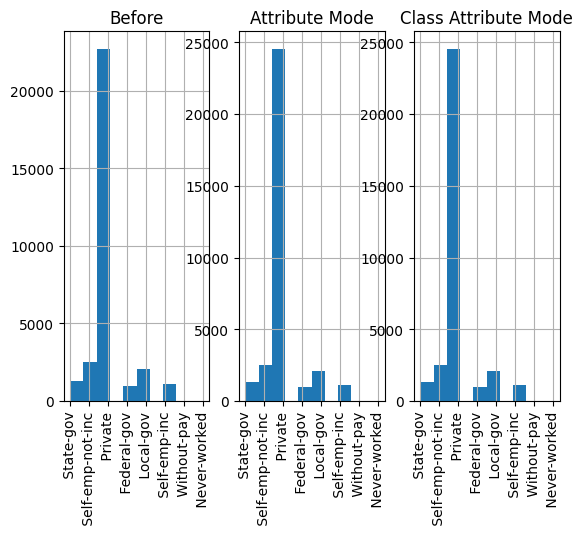

In [36]:
figs, axes = plt.subplots(1,3)

data['workclass'].hist(ax=axes[0])
axes[0].set_title('Before')

data2['workclass'].hist(ax=axes[1])
axes[1].set_title('Attribute Mode')

data3['workclass'].hist(ax=axes[2]) 
axes[2].set_title('Class Attribute Mode')

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

Replacing missing values by the mode 'private' in the attribute 'workclass' increases its count by 1836.

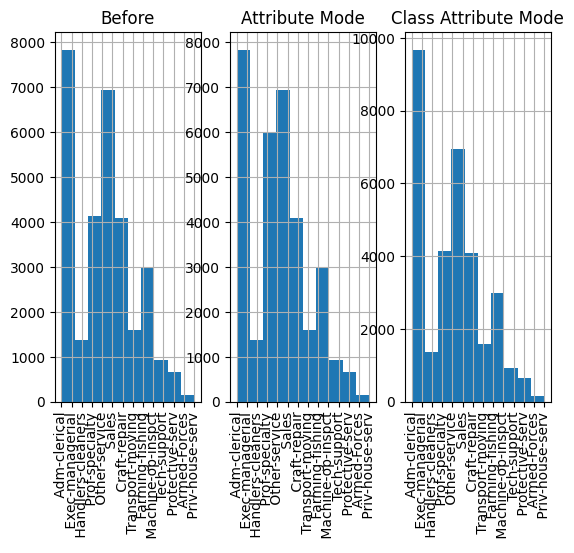

In [37]:
figs, axes = plt.subplots(1,3)

data['occupation'].hist(ax=axes[0])
axes[0].set_title('Before')

data2['occupation'].hist(ax=axes[1])
axes[1].set_title('Attribute Mode')

data3['occupation'].hist(ax=axes[2]) 
axes[2].set_title('Class Attribute Mode')

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

For missing attribute 'occupation': the mode by class is Adm-clerical for class 0 ( <=50k ) and Exec-managerial	for class 1 ( >50k ) and the mode overall (both classes) is  Prof-specialty. After replacing the values, the second histogram shows us an increase of 1843 in that bin and the third histogram increases in the Admin-clerical bin significantly higher than the Exec-managerial bin as most features are of class 0.

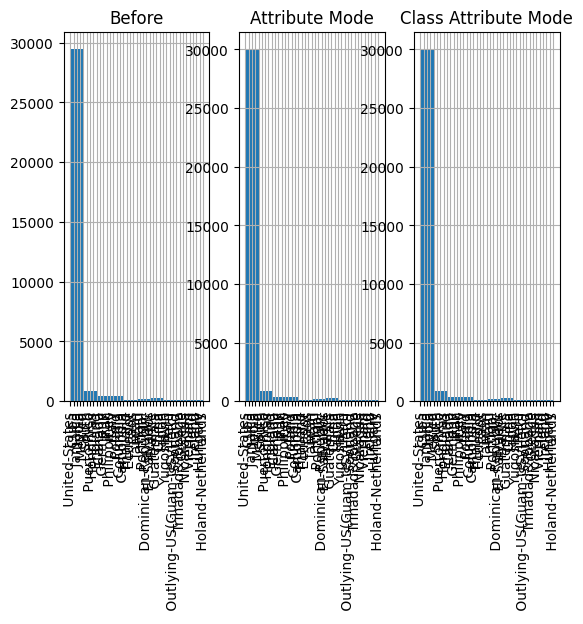

In [39]:
figs, axes = plt.subplots(1,3)

data['native-country'].hist(ax=axes[0])
axes[0].set_title('Before')

data2['native-country'].hist(ax=axes[1])
axes[1].set_title('Attribute Mode')

data3['native-country'].hist(ax=axes[2]) 
axes[2].set_title('Class Attribute Mode')

for ax in axes:
    ax.tick_params(axis='x', labelrotation=90)

The mode by attribute and class attribute are the same, so only the United States bin increases across the last two histograms with approximately 3000 occurrences.